In [1]:
import os
import sys
import smbus
import time

from datetime import datetime

In [2]:
# get current working directory and append relative path for package import
if os.name == 'posix':
    _wd = !pwd
    _wd = _wd[0]
elif os.name == 'nt':
    _wd = !cd
    _wd = _wd[0]
else:
    _wd = os.getcwd()
print('Current working directory is:', _wd)
p = os.path.dirname(_wd)
p = os.path.join(p, '.')
p = os.path.abspath(p)
print('Appending directory to path:', p)
sys.path.insert(0, p)

# alternatively, manually set the path to meerkat
#sys.path.insert(0, '/path_to_meerkat')

Current working directory is: /home/colin/code/meerkat/examples
Appending directory to path: /home/colin/code/meerkat


In [3]:
from meerkat import mcp9808

In [4]:
i2c = smbus.SMBus(1)
dev = mcp9808.MCP9808(bus=i2c)

In [5]:
dev.get_temp()

20.3125

In [6]:
dev.print_status()

Configuration Register: None
Upper Temperature: None
Lower Temperature: None
Critical Temperature: None
Manufacturer: 84
Device ID: 4
Device Revision: 0


In [7]:
t_end = datetime(year=2018, month=10, day=22, hour=0)

In [8]:
while datetime.now() < t_end:
    dev.write(t=time.ctime(), sid='multiday_test')
    time.sleep(300)

In [9]:
from meerkat import parser

In [10]:
import pandas as pd

In [11]:
dev.writer.path

'2018_10_16_20_07_20_311517_data.txt'

In [12]:
meta, df = parser.csv_resource(dev.writer.path)

In [13]:
import matplotlib.pyplot as plt

In [14]:
df['datetime64_ns'] = pd.to_datetime(df.datetime)

In [15]:
df.head()

,datetime,sample_id,temperature,datetime64_ns
0,Tue Oct 16 20:07:20 2018,multiday_test,20.3125,2018-10-16 20:07:20
1,Tue Oct 16 20:12:20 2018,multiday_test,20.2500,2018-10-16 20:12:20
2,Tue Oct 16 20:17:20 2018,multiday_test,20.0000,2018-10-16 20:17:20
3,Tue Oct 16 20:22:20 2018,multiday_test,19.9375,2018-10-16 20:22:20
4,Tue Oct 16 20:27:20 2018,multiday_test,19.8125,2018-10-16 20:27:20


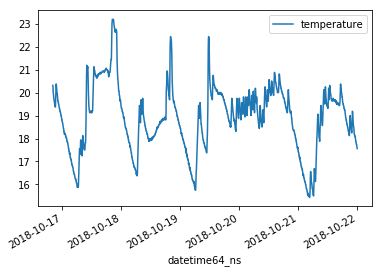

In [16]:
df[['datetime64_ns', 'temperature']].plot(x='datetime64_ns');